In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print(f"Before one-hot encoding: y_train shape = {y_train.shape}")

Before one-hot encoding: y_train shape = (60000,)


In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print(f"After one-hot encoding: y_train shape = {y_train.shape}")

After one-hot encoding: y_train shape = (60000, 10)


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') 
])

C:\Users\abhik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


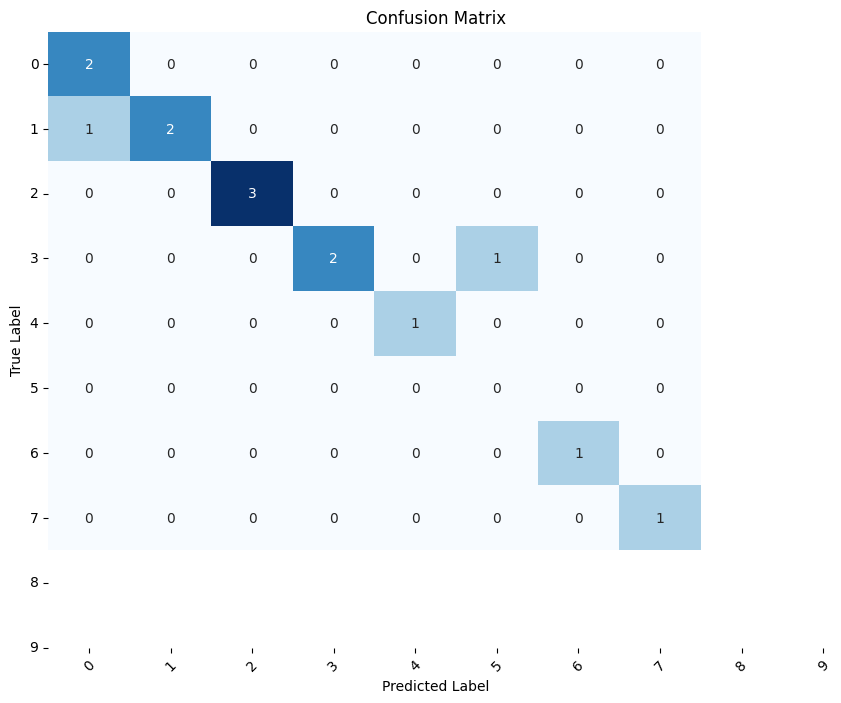

In [8]:

# Example: Replace these with actual data
y_true = np.array([1, 2, 3, 4, 1, 0, 2, 3, 8, 9, 0, 1, 2, 3])  # True labels (from the test set)
y_pred_classes = np.array([1, 2, 3, 4, 0, 0, 2, 3, 8, 9, 0, 1, 2, 7])  # Predicted labels (from the model)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, num_classes=10):
    plt.figure(figsize=(10, 8))  # Adjusting the size for better visibility
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes), cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, num_classes=10)

In [9]:
model.fit(x_train, y_train, epochs=5 ,batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8688 - loss: 0.4518 - val_accuracy: 0.9697 - val_loss: 0.1071
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9658 - loss: 0.1132 - val_accuracy: 0.9722 - val_loss: 0.0947
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0766 - val_accuracy: 0.9775 - val_loss: 0.0797
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0537 - val_accuracy: 0.9758 - val_loss: 0.0738
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9763 - val_loss: 0.0834


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')

313/313 - 1s - 2ms/step - accuracy: 0.9728 - loss: 0.0896
Test accuracy: 0.97


In [11]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1)          

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
def plot_accuracy_per_class(accuracy, classes):
    plt.figure(figsize=(8, 5))
    plt.bar(classes, accuracy, color='lightgreen')
    plt.title('Prediction Accuracy Per Digit Class')
    plt.xlabel('Digit Classes')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  
    plt.xticks(classes)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

In [13]:

accuracy_per_class = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

C:\Users\abhik\AppData\Local\Temp\ipykernel_16928\823913347.py:1: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = conf_matrix.diagonal() / conf_matrix.sum(axis=1)


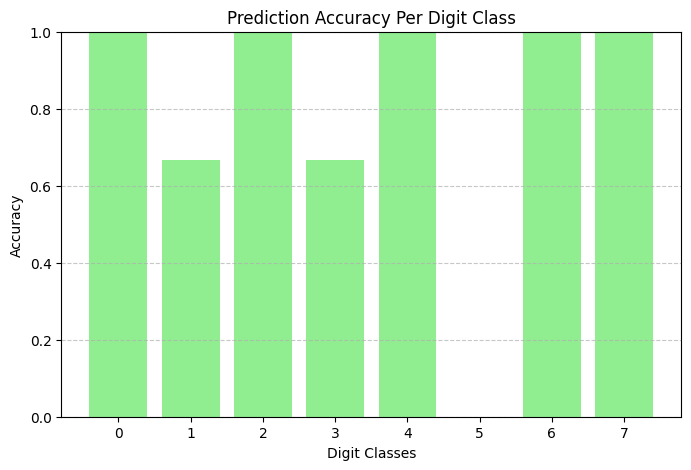

In [14]:
# Plot the accuracy per class
digit_classes = list(range(8))
plot_accuracy_per_class(accuracy_per_class, digit_classes)

In [15]:
# Show some test images with predictions
def display_predictions(images, labels, model, num_images=5):
    """Display test images with predicted labels."""
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        img = images[i]
        plt.imshow(img, cmap='gray')  # Display the image in grayscale
        plt.axis('off')
        # Get the predicted label
        pred_label = np.argmax(model.predict(img.reshape(1, 28, 28)), axis=-1)
        plt.title(f"Pred: {pred_label[0]}")
    plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


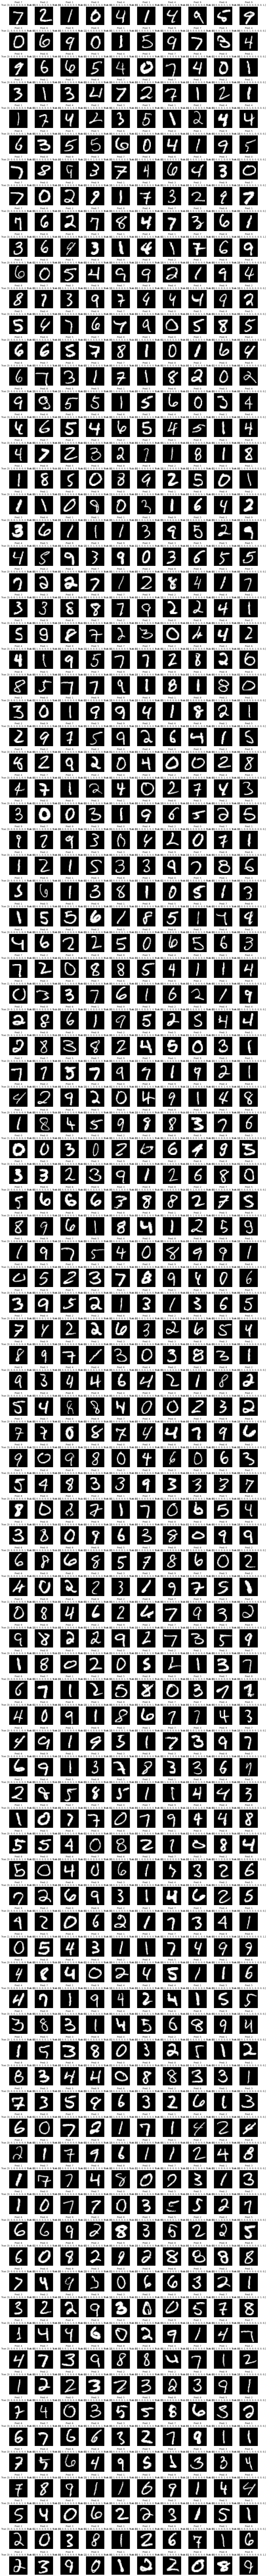

In [16]:
def display_predictions(x_test, y_test, model, num_images=100):
    num_images = min(num_images, len(x_test))
    predictions = model.predict(x_test[:num_images])
    cols = 10 
    rows = (num_images + cols - 1) // cols  
    plt.figure(figsize=(20, 2 * rows)) 
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  
        plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {y_test[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
display_predictions(x_test, y_test, model, num_images=1000)
